<a href="https://colab.research.google.com/github/josephsintum/plant_ml_colab/blob/main/tomatoes_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh
!bash icevision_install.sh cuda11 master

import IPython
IPython.Application.instance().kernel.do_shutdown(True)
import icevision
from icevision.all import *

--2022-02-28 01:07:07--  https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2691 (2.6K) [text/plain]
Saving to: ‘icevision_install.sh’

icevision_install.s 100%[===================>]   2.63K  --.-KB/s    in 0s      

2022-02-28 01:07:08 (47.1 MB/s) - ‘icevision_install.sh’ saved [2691/2691]

Installing icevision + dependencices for cuda11
- Installing torch and its dependencies
Looking in links: https://download.pytorch.org/whl/torch_stable.html
- Installing mmcv
     |████████████████████████████████| 51.3 MB 3.9 MB/s 
     |████████████████████████████████| 190 kB 12.9 MB/s 
- Installing mmdet
     |████████████████████████████████| 1.2 MB 13.4 MB/s 
- Installing icevision from ma

INFO     - Downloading default `.ttf` font file - SpaceGrotesk-Medium.ttf from https://raw.githubusercontent.com/airctic/storage/master/SpaceGrotesk-Medium.ttf to /root/.icevision/fonts/SpaceGrotesk-Medium.ttf | icevision.visualize.utils:get_default_font:70
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31


0B [00:00, ?B/s]

# New Section

In [ ]:
!git clone https://github.com/josephsintum/PlantDoc-Object-Detection-Dataset.git

Cloning into 'PlantDoc-Object-Detection-Dataset'...
remote: Enumerating objects: 5200, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 5200 (delta 4), reused 8 (delta 2), pack-reused 5190
Receiving objects: 100% (5200/5200), 941.96 MiB | 29.61 MiB/s, done.
Resolving deltas: 100% (2332/2332), done.
Checking out files: 100% (5201/5201), done.


In [ ]:
!pwd  # output: '/content'
!ls  # output: PlantDoc-Object-Detection-Dataset

/content
icevision_install.sh  PlantDoc-Object-Detection-Dataset  sample_data


In [ ]:
%cd PlantDoc-Object-Detection-Dataset/
!ls

/content/PlantDoc-Object-Detection-Dataset
LICENSE.txt	 TRAIN			      train_labels_tomatoes.csv
TEST		 train_labels.csv
test_labels.csv  train_labels_strawberry.csv


In [ ]:
from icevision.all import *

data_dir = Path('.')
print(data_dir)

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


INFO     - The mmdet config folder already exists. No need to downloaded it. Path : /root/.icevision/mmdetection_configs/mmdetection_configs-2.20.1/configs | icevision.models.mmdet.download_configs:download_mmdet_configs:18


.


In [ ]:
import pandas as pd

annot = pd.read_csv('train_labels_tomatoes.csv')
annot.rename(columns={'class': 'label'}, inplace=True)
annot.sample(3)

filename  width  height  \
1005  tomato-yellow-leaf-curl-disease-260nw-1006958086.jpg    347     280   
1386            23633262_1572609386115825_1396180255_o.jpg   1440    1920   
510                                     happier-inside.jpg   3888    2592   

                         label  xmin  ymin  xmax  ymax  
1005  Tomato leaf yellow virus   177     2   297    73  
1386          Tomato mold leaf   260   360   981  1549  
510                Tomato leaf  2515   843  3415  1443

In [ ]:
annot.filename.nunique()

677

In [ ]:
_CLASSES = annot['label'].unique().tolist()
len(_CLASSES)

class_map = ClassMap(_CLASSES)

In [ ]:
template_record = ObjectDetectionRecord()

class PlantDocParser(Parser):
    def __init__(self, template_record, data_dir):
        super().__init__(template_record=template_record)
        self.data_dir = data_dir
        self.df = annot
        self.class_map = class_map

    def __iter__(self) -> Any:
        for o in self.df.itertuples():
            yield o

    def __len__(self) -> int:
        return len(self.df)

    def record_id(self, o) -> Hashable:
        return o.filename

    def parse_fields(self, o, record, is_new):
        if is_new:
            filepath = self.data_dir / 'TRAIN' / o.filename
            # print(filepath)
            record.set_filepath(filepath)
            if filepath.exists():
                image_size = get_img_size(filepath)
                record.set_img_size(image_size)  #
            record.detection.set_class_map(self.class_map)
        record.detection.add_bboxes(
            [BBox.from_xyxy(o.xmin, o.ymin, o.xmax, o.ymax)])
        record.detection.add_labels([o.label])

  0%|          | 0/2740 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/677 [00:00<?, ?it/s]

AUTOFIX-SUCCESS - (record_id: happier-inside.jpg) - Clipping bbox xmax from 3415 to image width 2592 (Before: <BBox (xmin:2515, ymin:843, xmax:3415, ymax:1443)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: happier-inside.jpg) - Clipping bbox xmax from 2953 to image width 2592 (Before: <BBox (xmin:2234, ymin:1519, xmax:2953, ymax:1991)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: flies.jpg) - Clipping bbox xmax from 3806 to image width 2592 (Before: <BBox (xmin:1, ymin:86, xmax:3806, ymax:2430)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: photo-1.jpg) - Clipping bbox xmax from 851 to image width 750 (Before: <BBox (xmin:258, ymin:263, xmax:851, ymax:604)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: early-blight-in-high-tunnel-tomatoes-19tm74h.jpg) - Clipping bbox xmax from 2267 to image width 2091 (Before: <BBox (xmin:989, ymin:160, xmax:2267, ymax:1174)>) |

BaseRecord

common: 
	- Image size ImgSize(width=500, height=438)
	- Filepath: TRAIN/tomato-plant-virus-tomato-yellow-leaf-curl-virus-tomato-plant-disease-mosaic-virus.jpg
	- Img: None
	- Record ID: tomato-plant-virus-tomato-yellow-leaf-curl-virus-tomato-plant-disease-mosaic-virus.jpg
detection: 
	- BBoxes: [<BBox (xmin:120, ymin:18, xmax:195, ymax:107)>, <BBox (xmin:351, ymin:34, xmax:443, ymax:98)>, <BBox (xmin:167, ymin:296, xmax:254, ymax:396)>, <BBox (xmin:257, ymin:170, xmax:321, ymax:225)>, <BBox (xmin:1, ymin:186, xmax:70, ymax:258)>, <BBox (xmin:26, ymin:52, xmax:74, ymax:125)>, <BBox (xmin:81, ymin:54, xmax:135, ymax:115)>, <BBox (xmin:206, ymin:57, xmax:353, ymax:147)>, <BBox (xmin:303, ymin:163, xmax:473, ymax:257)>, <BBox (xmin:333, ymin:224, xmax:471, ymax:331)>, <BBox (xmin:133, ymin:209, xmax:302, ymax:314)>, <BBox (xmin:285, ymin:283, xmax:403, ymax:438)>]
	- Class Map: <ClassMap: {'background': 0, 'Tomato leaf late blight': 1, 'Tomato mold leaf': 2, 'Tomato leaf yello

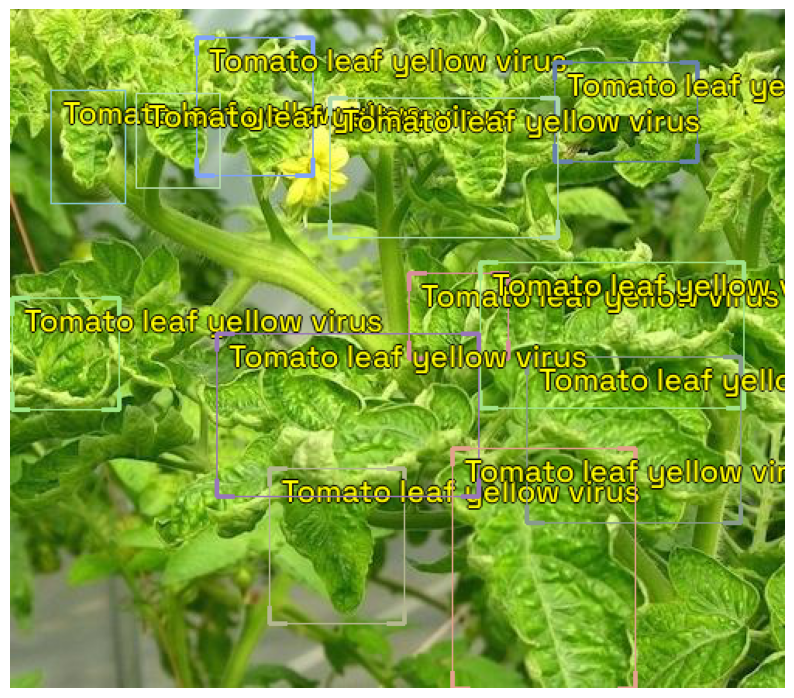

In [ ]:
parser = PlantDocParser(template_record, data_dir)
train_records, valid_records = parser.parse()
show_record(train_records[0], class_map=class_map, 
            figsize = (10,10),font_size=20, label_color = '#ffff00')
train_records[0]

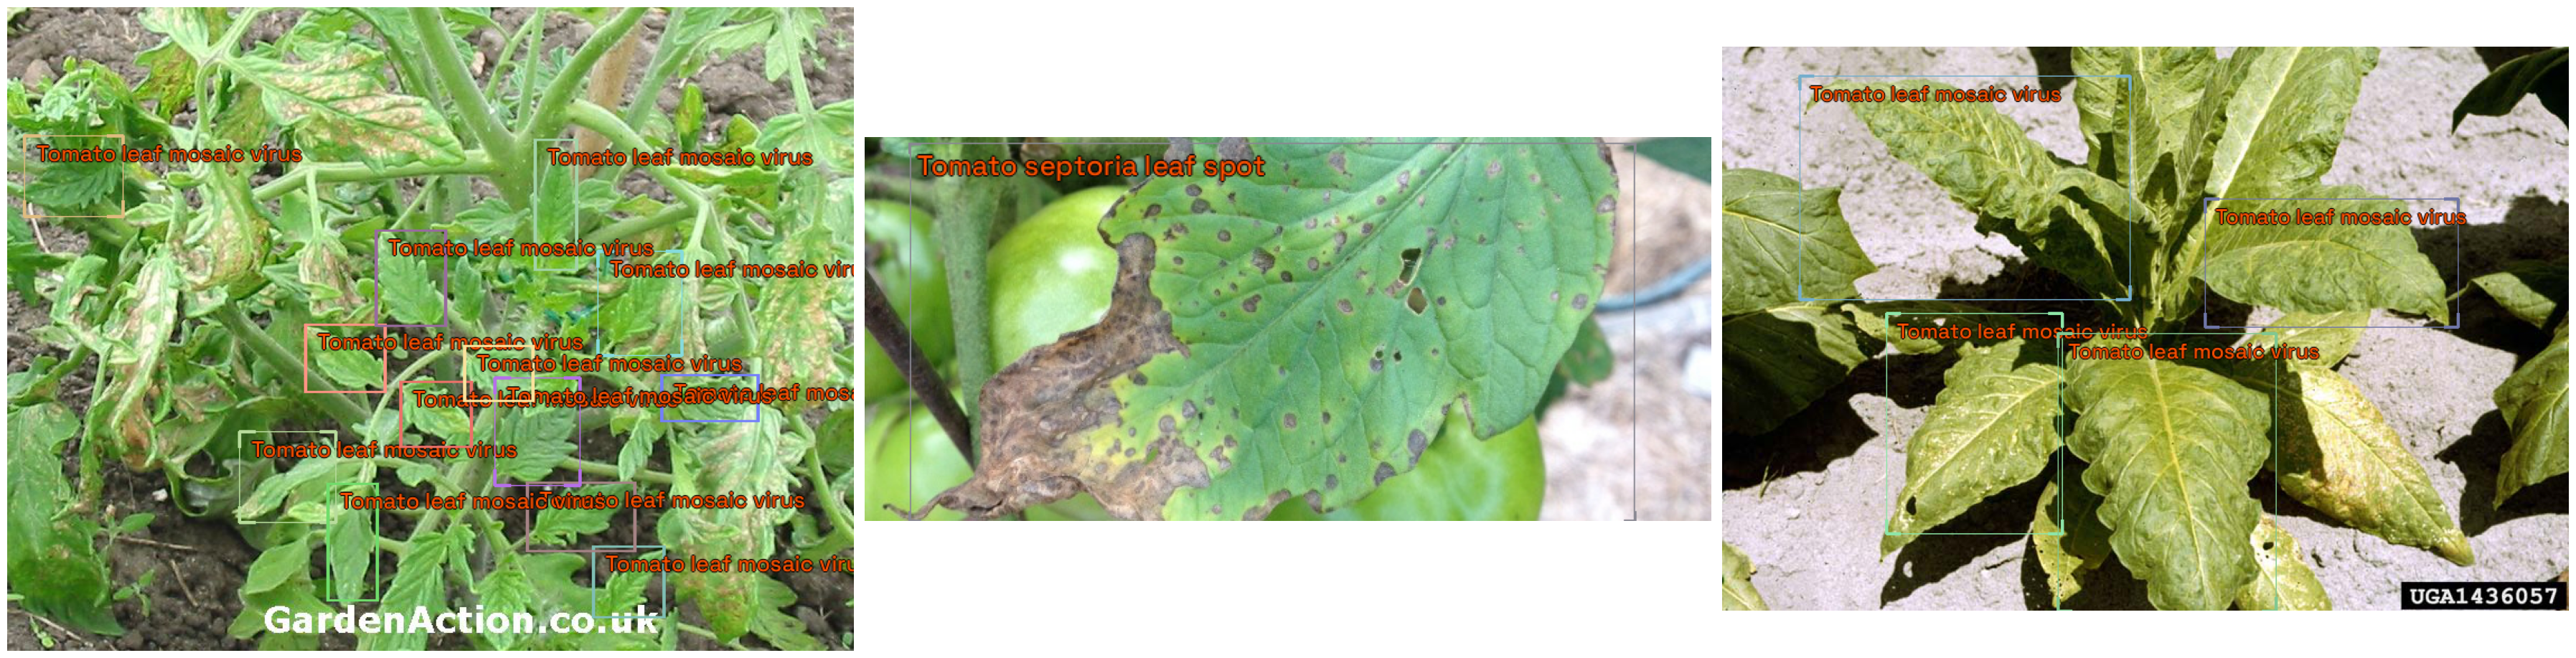

In [ ]:
show_records(train_records[33:36], ncols=3,
             font_size=20, label_color='#ff5000')

In [ ]:
presize = 512
image_size = 384
train_tfms = tfms.A.Adapter(
    [*tfms.A.aug_tfms(size=image_size, presize=presize), tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter(
    [*tfms.A.resize_and_pad(size=image_size), tfms.A.Normalize()])
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)
samples = [train_ds[38] for _ in range(3)]
show_samples(samples, ncols=3, font_size=22, label_color='#ffff00')

In [ ]:
import matplotlib.pyplot as plt


def plot_metrics(learn, title, x, y):
    plt.plot(L(learn.recorder.values).itemgot())
    plt.xlabel('epoch')
    plt.ylabel('mAP (green), Loss (blue, orange)')
    plt.title(title)
    plt.text(x, y,
             'Legend: mAP(green), train_loss(blue), valid_loss(orange')

In [ ]:
model_type = models.ultralytics.yolov5 
backbone = model_type.backbones.small
model = model_type.model(backbone = backbone(pretrained=True), 
            num_classes=len(parser.class_map),img_size = image_size)
train_dl = model_type.train_dl(
            train_ds, batch_size=16, num_workers=4, shuffle=True)
valid_dl = model_type.valid_dl(
            valid_ds, batch_size=16, num_workers=4, shuffle=False)
                                       
learn = model_type.fastai.learner(
            dls=[train_dl, valid_dl], model=model, metrics=metrics)
# learn.lr_find()
learn.fine_tune(30, 3e-3 , freeze_epochs=1) 
plot_metrics(learn, 
       'Mean Average Precision and Losses for YOLOv5', 0,-0.23)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = Path('/content/gdrive/My Drive/')
fname_model = 'plantdoc-yolov5_tomatoes.pth'
# create a 'models' folder in GDrive prior to running the following line:
torch.save(model.state_dict(), root_dir/'models'/fname_model) 